# Check Bylot forcing files

Downloaded from https://nordicana.cen.ulaval.ca/dpage.aspx?doi=45693CE-02685A5200DD4C38 the 06/02/2024 by Mickaël Lalande

- Article (Domine et al., 2021) : https://essd.copernicus.org/articles/13/4331/2021/
- Données : https://nordicana.cen.ulaval.ca/dpage.aspx?doi=45693CE-02685A5200DD4C38

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'

## Bylot Island, Canadian high Arctic

In [3]:
df = pd.read_csv(path+'/Bylot/Bylot_driving_dataV2.csv', parse_dates=['DATE'], dayfirst=True, index_col=['DATE'])
ds = df.to_xarray()
df

,WindSpeed m/s,0=Data; 1=Gap-filled,Air Temp. °C,Relative Humidity,Specific humidity g/kg,Long Wave Downwell. CNR4 W m-2,0=CNR4; 1=Modified ERA,Long Wave Downwell. ERA5 W m-2,Short Wave downwell. CNR4 W m-2,0=CNR4; 1=Modified ERA,Short Wave downwell. ERA5 W m-2,Pressure kPa,Precip. Total mm/h,Precip. Rain,Precip. Snow,Precip season cumul
DATE,,,,,,,,,,,,,,,,
2013-07-11 09:00:00,1.530,0,6.819953,91.18,5.6257,308.859,0,298.371,250.90,0,354.711,100.188543,0.0,0.0,0.0,0.000000
2013-07-11 10:00:00,1.405,0,6.957644,89.27,5.5593,299.669,0,289.269,310.49,0,419.291,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 11:00:00,2.021,0,8.925269,90.20,6.4263,289.596,0,278.748,672.70,0,490.762,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 12:00:00,2.559,0,10.422386,89.57,7.0594,280.483,0,267.848,370.67,0,569.034,100.198543,0.0,0.0,0.0,0.000000
2013-07-11 13:00:00,2.749,0,8.218802,88.42,6.0033,283.789,0,257.987,372.92,0,589.216,100.198543,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-25 06:00:00,0.713,0,11.119000,63.97,5.2158,245.120,0,206.344,343.93,0,359.763,101.345000,0.0,0.0,0.0,20.503224
2019-06-25 07:00:00,0.908,0,10.895000,64.35,5.1667,259.830,0,207.897,419.45,0,436.212,101.390000,0.0,0.0,0.0,20.503224
2019-06-25 08:00:00,2.065,0,10.744000,62.69,4.9798,251.450,0,210.618,516.75,0,514.440,101.440000,0.0,0.0,0.0,20.503224


### Convert to SnowMIP format

In [4]:
df_forcing = df.copy()

df_forcing.index.names = ['time']

df_forcing.rename(
    columns={
        'WindSpeed m/s': 'Wind', 
        'Air Temp. °C': 'Tair', 
        'Specific humidity g/kg': 'Qair', # to change in kg/kg (as expected by CLASSIC)
        'Long Wave Downwell. CNR4 W m-2': 'LWdown',
        'Short Wave downwell. CNR4 W m-2': 'SWdown',
        'Pressure kPa': 'Psurf', # to change in Pa (as expected by CLASSIC)
        'Precip. Rain': 'Rainf', # to change in kg m^{-2) s^{-1)
        'Precip. Snow': 'Snowf', # to change in kg m^{-2) s^{-1)
    }, 
    inplace=True
)

# However, since some ERA5 values were probably underestimated, this resulted in some albedo values > 1, which is not 
# consistent with a sound radiation budget. Some data users may decide to modify some of the ERA5-derived SW↓ values 
# presented here to ensure a reasonable albedo value, probably around 0.8.

df_forcing.drop(
    columns=[
        '0=Data; 1=Gap-filled', 
        'Relative Humidity',
        'Long Wave Downwell. ERA5 W m-2',
        'Short Wave downwell. ERA5 W m-2',
        'Precip. Total  mm/h',
        'Precip  season cumul'  
    ], 
    inplace=True
)

# To remove this column that appear twice: '0=CNR4; 1=Modified ERA'
df_forcing = df_forcing.drop(df_forcing.columns[4], axis=1)
df_forcing = df_forcing.drop(df_forcing.columns[5], axis=1)

df_forcing.Qair = df_forcing.Qair*1e-3 # g/kg -> kg/kg (as expected by CLASSIC)
df_forcing.Psurf = df_forcing.Psurf*1e3 # kPa -> Pa (as expected by CLASSIC)
df_forcing.Rainf = df_forcing.Rainf/3600 # mm/h -> mm/s (as expected by CLASSIC)
df_forcing.Snowf = df_forcing.Snowf/3600 # mm/h -> mm/s (as expected by CLASSIC)

df_forcing

,Wind,Tair,Qair,LWdown,SWdown,Psurf,Rainf,Snowf
time,,,,,,,,
2013-07-11 09:00:00,1.530,6.819953,0.005626,308.859,250.90,100188.5431,0.0,0.0
2013-07-11 10:00:00,1.405,6.957644,0.005559,299.669,310.49,100198.5431,0.0,0.0
2013-07-11 11:00:00,2.021,8.925269,0.006426,289.596,672.70,100198.5431,0.0,0.0
2013-07-11 12:00:00,2.559,10.422386,0.007059,280.483,370.67,100198.5431,0.0,0.0
2013-07-11 13:00:00,2.749,8.218802,0.006003,283.789,372.92,100198.5431,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-06-25 06:00:00,0.713,11.119000,0.005216,245.120,343.93,101345.0000,0.0,0.0
2019-06-25 07:00:00,0.908,10.895000,0.005167,259.830,419.45,101390.0000,0.0,0.0
2019-06-25 08:00:00,2.065,10.744000,0.004980,251.450,516.75,101440.0000,0.0,0.0


In [5]:
ds_forcing = df_forcing.to_xarray()
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Data variables:
    Wind     (time) float64 1.53 1.405 2.021 2.559 ... 0.908 2.065 1.45 1.135
    Tair     (time) float64 6.82 6.958 8.925 10.42 ... 10.89 10.74 10.43 9.186
    Qair     (time) float64 0.005626 0.005559 0.006426 ... 0.004952 0.004424
    LWdown   (time) float64 308.9 299.7 289.6 280.5 ... 259.8 251.4 253.9 257.9
    SWdown   (time) float64 250.9 310.5 672.7 370.7 ... 419.4 516.8 580.8 679.0
    Psurf    (time) float64 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

## Check ERA5 precip

In [10]:
lat = 73.1504
lon = -80.0046

In [7]:
ds_ERA5 = xr.open_dataset(path+'/Bylot/Bylot_ERA5_precip_2014-2018.nc')
ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 9, time: 43824)
Coordinates:
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -79.5 -79.25 -79.0
  * latitude   (latitude) float32 74.0 73.75 73.5 73.25 ... 72.5 72.25 72.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2018-12-31T23:00:00
Data variables:
    sf         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-09 22:39:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

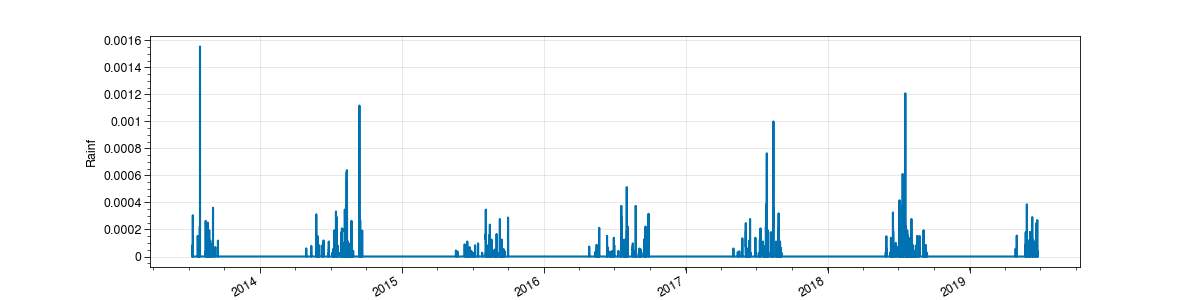

In [8]:
%matplotlib widget
ds_forcing.Rainf.plot(figsize=(12,3))

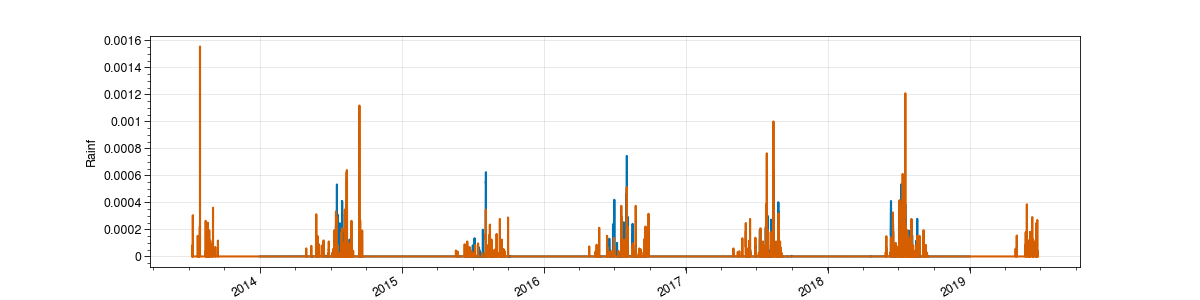

In [16]:
%matplotlib widget
( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').plot(figsize=(12,3))
ds_forcing.Rainf.plot()

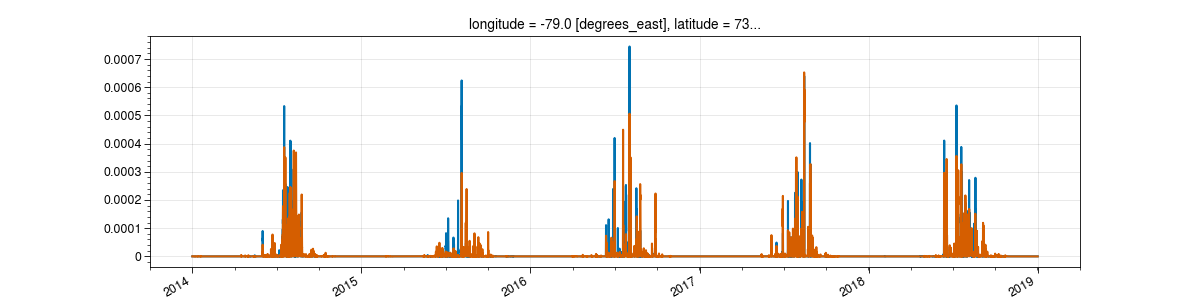

In [38]:
%matplotlib widget
# https://www.weather.gc.ca/past_conditions/index_e.html?station=npl
( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').plot(figsize=(12,3))
( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 ).sel(latitude=73.67, longitude=-78.29, method='nearest').plot()
# ds_forcing.Rainf.plot()

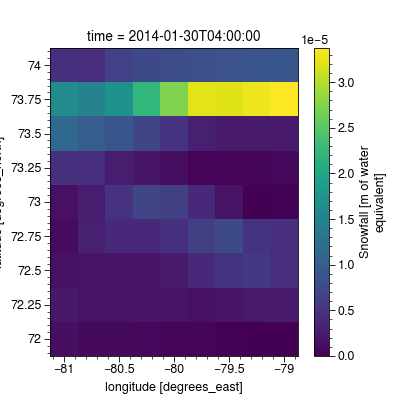

In [32]:
%matplotlib widget
lat = 73.1504
lon = -80.0046
ds_ERA5.sf[700].plot()

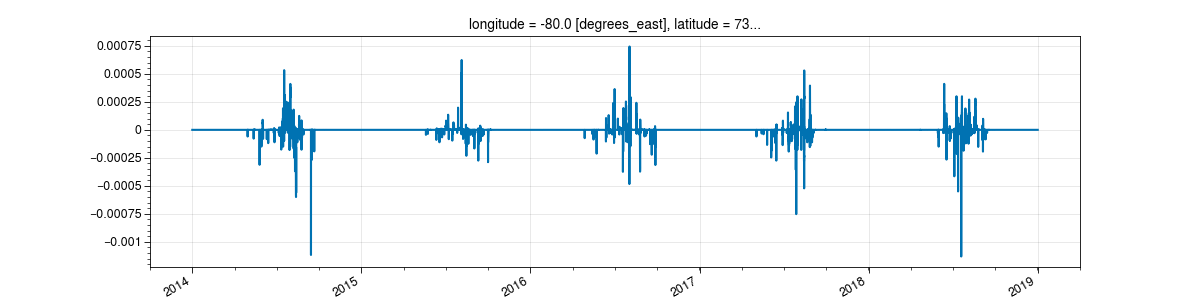

In [22]:
%matplotlib widget
( (ds_ERA5.tp - ds_ERA5.sf)/3600*1e3 - ds_forcing.Rainf ).sel(latitude=lat, longitude=lon, method='nearest').plot(figsize=(12,3))

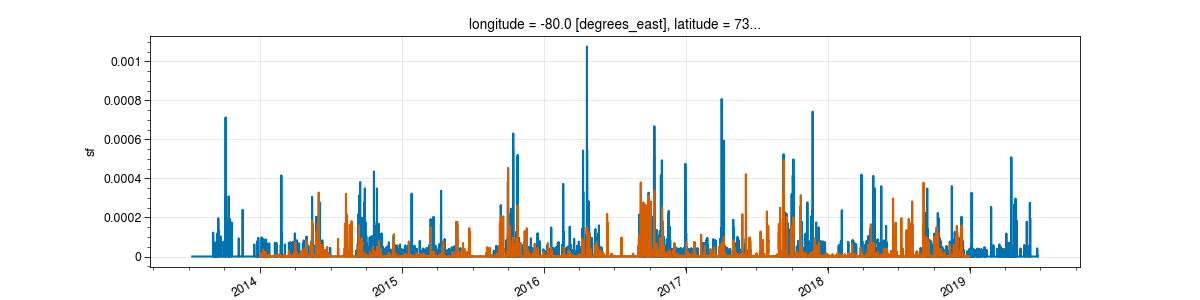

In [39]:
%matplotlib widget
ds_forcing.Snowf.plot(figsize=(12,3))
( ds_ERA5.sf/3600*1e3 ).sel(latitude=lat, longitude=lon, method='nearest').plot()


In [51]:
ds_forcing.Rainf.values = SWdwon_30.values

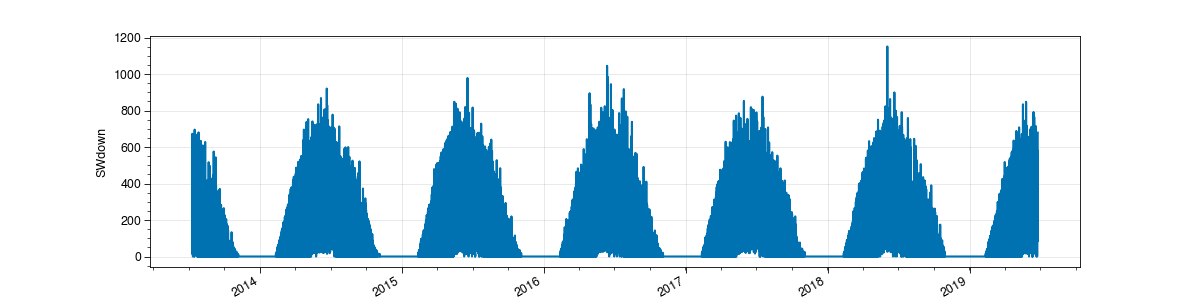

In [52]:
%matplotlib widget
ds_forcing.SWdown.plot(figsize=(12,3))

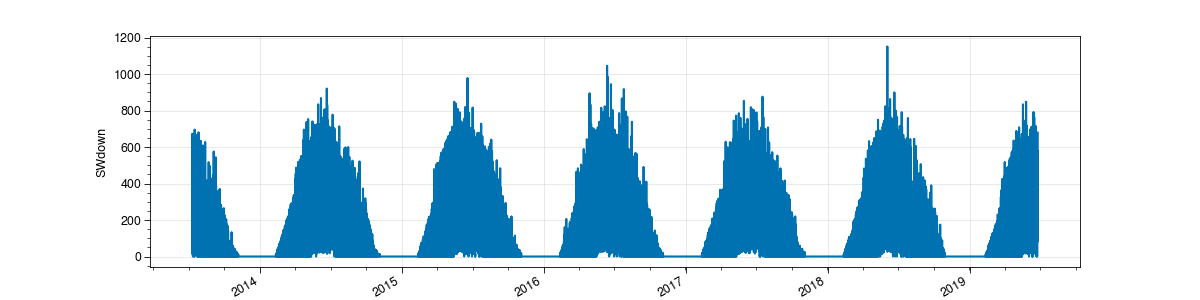

In [50]:
%matplotlib widget
ds_forcing.SWdown.plot(figsize=(12,3))

In [53]:
ds_forcing_ex = xr.open_dataset(path+'/met_insitu_sap_2005_2015.nc')
ds_forcing_ex

<xarray.Dataset>
Dimensions:  (time: 87648)
Coordinates:
  * time     (time) datetime64[ns] 2005-10-01T01:00:00 ... 2015-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [54]:
# Set the variables attributes as in SnowMIP
for var in list(ds_forcing.keys()):
    ds_forcing[var].attrs = ds_forcing_ex[var].attrs

# Only modify the temperature unit already prepared for CLASSIC inputs
ds_forcing['Tair'].attrs['units'] = '°C'
ds_forcing.to_netcdf(path+'/Bylot/met_insitu_byl_1.3SWd_2013_2019.nc')
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Data variables:
    Wind     (time) float64 1.53 1.405 2.021 2.559 ... 0.908 2.065 1.45 1.135
    Tair     (time) float64 6.82 6.958 8.925 10.42 ... 10.89 10.74 10.43 9.186
    Qair     (time) float64 0.005626 0.005559 0.006426 ... 0.004952 0.004424
    LWdown   (time) float64 308.9 299.7 289.6 280.5 ... 259.8 251.4 253.9 257.9
    SWdown   (time) float64 250.9 310.5 672.7 370.7 ... 419.4 516.8 580.8 679.0
    Psurf    (time) float64 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

### SWdown

In [55]:
ds_forcing.SWdown

<xarray.DataArray 'SWdown' (time: 52202)>
array([250.9 , 310.49, 672.7 , ..., 516.75, 580.81, 679.  ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  SWdown
    CMIP_name:  rsds
    long_name:  Surface downward shortwave radiation
    units:      W/m2

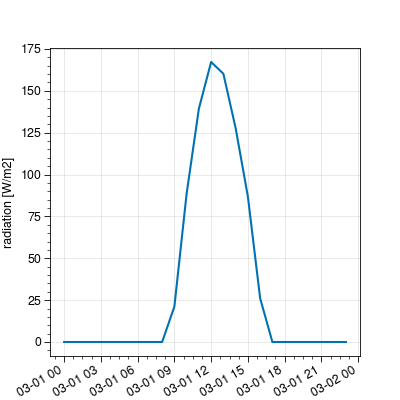

In [58]:
# Local time?
%matplotlib widget
ds_forcing.SWdown.sel(time='2016-03-01').plot()

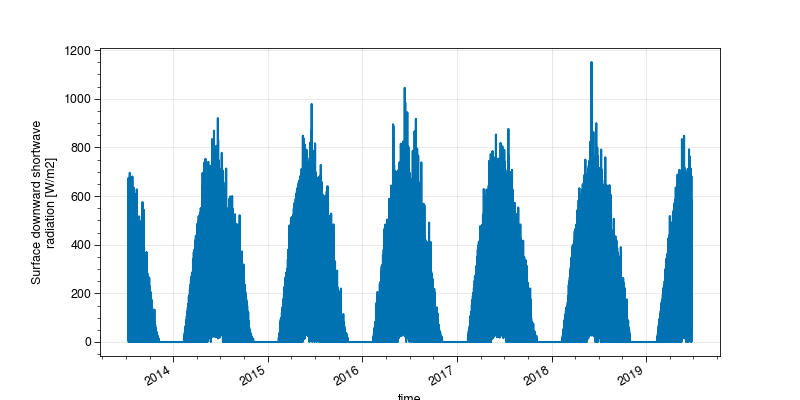

In [57]:
%matplotlib widget
ds_forcing.SWdown.plot(figsize=(8,4))

### LWdown

In [59]:
ds_forcing.LWdown

<xarray.DataArray 'LWdown' (time: 52202)>
array([308.859, 299.669, 289.596, ..., 251.45 , 253.88 , 257.89 ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  LWdown
    CMIP_name:  rlds
    long_name:  Surface downward longwave radiation
    units:      W/m2

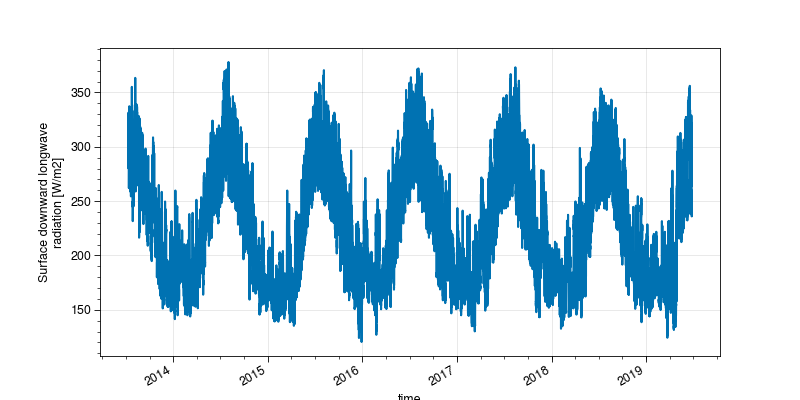

In [60]:
%matplotlib widget
ds_forcing.LWdown.plot(figsize=(8,4))

### Rainf

In [61]:
ds_forcing.Rainf

<xarray.DataArray 'Rainf' (time: 52202)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Rainf
    CMIP_name:  prra
    long_name:  Rainfall rate
    units:      kg/m2/s

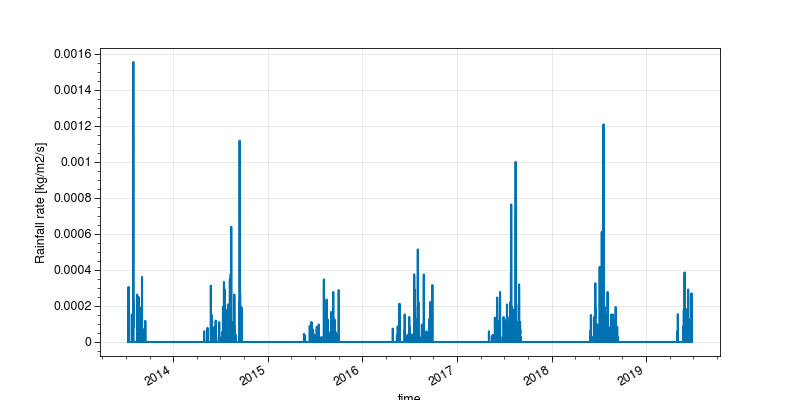

In [62]:
%matplotlib widget
ds_forcing.Rainf.plot(figsize=(8,4))

### Snowf

In [63]:
ds_forcing.Snowf

<xarray.DataArray 'Snowf' (time: 52202)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Snowf
    CMIP_name:  prsn
    long_name:  Snowfall rate
    units:      kg/m2/s

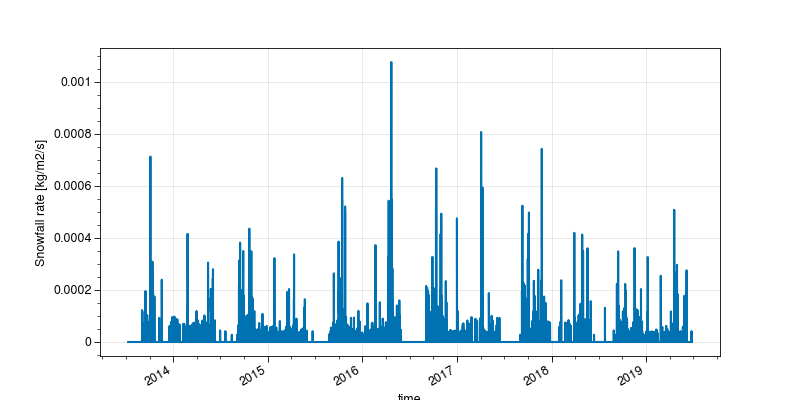

In [64]:
%matplotlib widget
ds_forcing.Snowf.plot(figsize=(8,4))

### Tair

In [65]:
ds_forcing.Tair

<xarray.DataArray 'Tair' (time: 52202)>
array([ 6.8199535 ,  6.95764435,  8.92526895, ..., 10.744     ,
       10.433     ,  9.186     ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Tair
    CMIP_name:  ta
    long_name:  Near-surface air temperature
    units:      °C

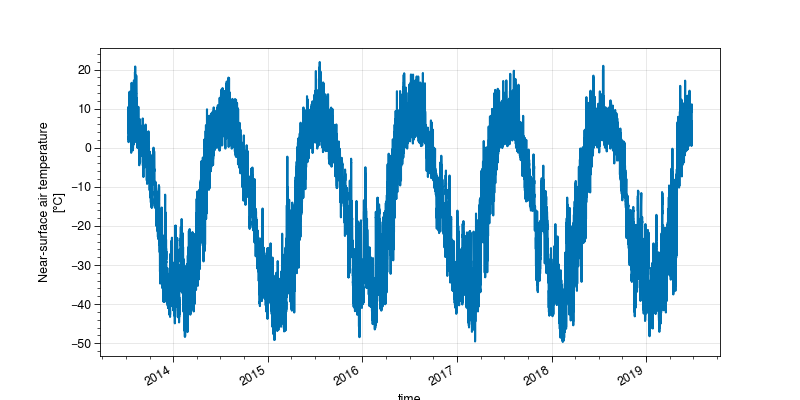

In [66]:
%matplotlib widget
ds_forcing.Tair.plot(figsize=(8,4))

### Qair

In [67]:
ds_forcing.Qair

<xarray.DataArray 'Qair' (time: 52202)>
array([0.0056257, 0.0055593, 0.0064263, ..., 0.0049798, 0.0049524,
       0.0044241])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Qair
    CMIP_name:  hus
    long_name:  Near-surface specific humidity
    units:      kg/kg

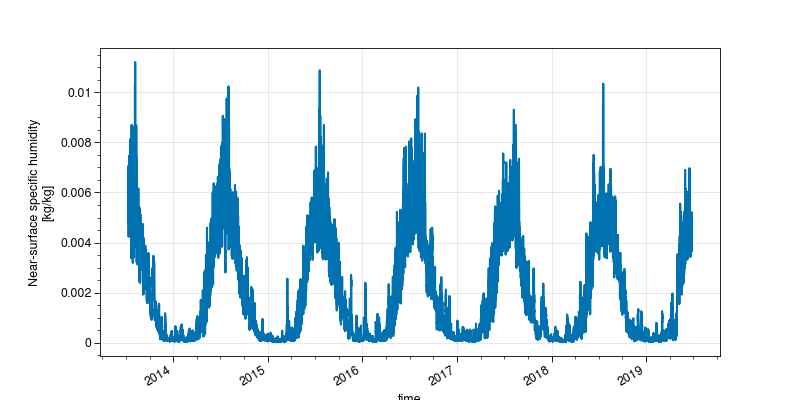

In [68]:
%matplotlib widget
ds_forcing.Qair.plot(figsize=(8,4))

### Wind

In [69]:
ds_forcing.Wind

<xarray.DataArray 'Wind' (time: 52202)>
array([1.53 , 1.405, 2.021, ..., 2.065, 1.45 , 1.135])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Wind
    CMIP_name:  ws
    long_name:  Near-surface wind speed
    units:      m/s

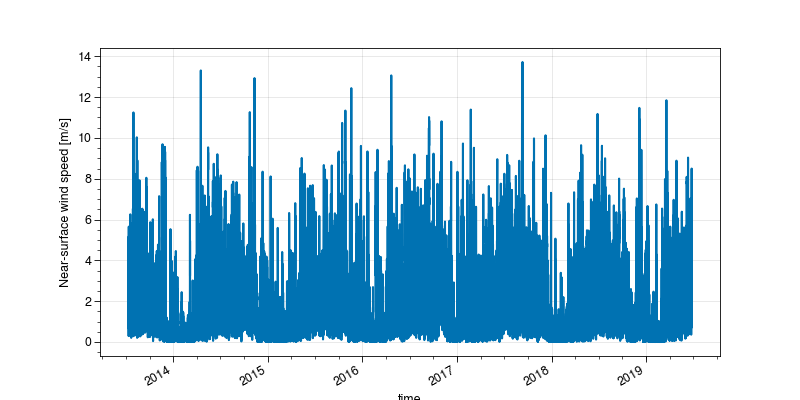

In [70]:
%matplotlib widget
ds_forcing.Wind.plot(figsize=(8,4))

### Psurf

In [71]:
ds_forcing.Psurf

<xarray.DataArray 'Psurf' (time: 52202)>
array([100188.5431, 100198.5431, 100198.5431, ..., 101440.    ,
       101495.    , 101535.    ])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-11T09:00:00 ... 2019-06-25T10:00:00
Attributes:
    ALMA_name:  Psurf
    CMIP_name:  ps
    long_name:  Surface pressure
    units:      Pa

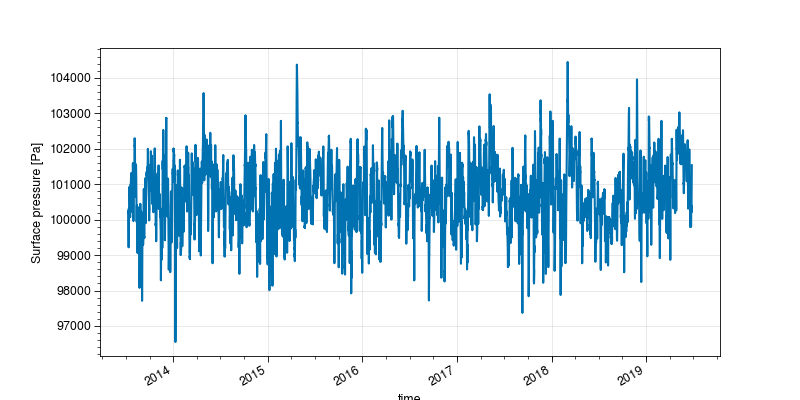

In [72]:
%matplotlib widget
ds_forcing.Psurf.plot(figsize=(8,4))